# Introduction
유튜브1: https://youtu.be/pIP6QvUshww  
유튜브2: https://youtu.be/ePLR3clfH6g  
유튜브3: https://youtu.be/blb3pmBJLRc

# ① MNIST

### Import

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'1.14.0'

### Load

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

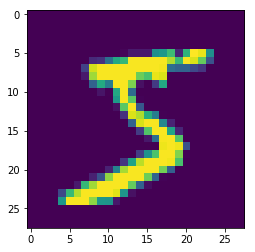

In [6]:
plt.imshow(X_train[0])

### Normalization

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### Model

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

W0427 19:00:13.471171  8584 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Training 

In [10]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2653 - acc: 0.9230
Epoch 2/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1088 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0741 - acc: 0.9770


### Evaluation

In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0958 - acc: 0.9715
0.09578466763249599
0.9715


### Model Save

In [12]:
model.save('mnist.model')

### Model Load

In [13]:
new_model = tf.keras.models.load_model('mnist.model')

W0427 19:06:44.286809  8584 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0427 19:06:44.288812  8584 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0427 19:06:44.461014  8584 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


### Predictions

In [25]:
predictions = new_model.predict([X_test])

In [29]:
np.argmax(predictions[0])

7

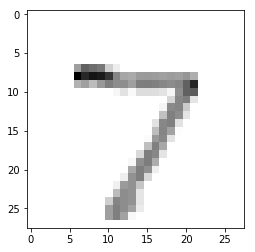

In [31]:
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

# ② 주식단타매매


### Import

In [573]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import pandas as pd
import numpy as np

### Load

In [574]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,매매횟수,종목코드,뉴스기사,최대거래대금 시간,최대거래대금,매수등락률,시가등락률,양봉개수,직전 거래대금
0,2022-03-29,고려시멘트,5230,2022-04-26 09:09:07,09:21:27,2.57,1,198440.0,1,09:06:00,113,16.22,6.22,1,63
1,2022-03-29,고려시멘트,5410,2022-04-26 09:28:09,09:32:19,1.55,2,198440.0,1,09:06:00,113,20.22,6.22,2,16
2,2022-03-29,영진약품,5490,2022-04-26 09:51:11,09:55:24,0.36,3,3520.0,1,09:50:00,62,6.60,0.19,1,62
3,2022-03-29,버킷스튜디오,5060,2022-04-26 09:58:16,09:59:56,-0.89,4,66410.0,1,09:22:00,72,11.58,3.09,0,26
4,2022-03-29,우리바이오,4390,2022-04-26 10:00:40,10:00:50,-0.87,5,82850.0,1,10:00:00,44,10.86,4.17,3,43


### Preprocessing

In [575]:
df['수익률'] = df['수익률'].apply(lambda x : 1 if x > 0 else 0 )
df['수익률'].unique()

array([1, 0], dtype=int64)

In [576]:
X = df[['뉴스기사', '직전 거래대금', '최대거래대금', '양봉개수']]
y = df['수익률']

In [577]:
X.shape, y.shape

((134, 4), (134,))

In [578]:
X = X.to_numpy()
y = y.to_numpy()

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [580]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Model

In [581]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adagrad(lr=0.2)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [582]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 12)                60        
_________________________________________________________________
dense_161 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


### Training

In [583]:
model.fit(X_train, y_train, epochs=200, batch_size=40)

Epoch 1/200
100/100 [==============================] - 2s 21ms/step - loss: 0.6873 - acc: 0.5000
Epoch 2/200
100/100 [==============================] - 0s 60us/step - loss: 0.6504 - acc: 0.6300
Epoch 3/200
100/100 [==============================] - 0s 70us/step - loss: 0.6061 - acc: 0.7000
Epoch 4/200
100/100 [==============================] - 0s 90us/step - loss: 0.5715 - acc: 0.7600
Epoch 5/200
100/100 [==============================] - 0s 100us/step - loss: 0.5048 - acc: 0.7600
Epoch 6/200
100/100 [==============================] - 0s 60us/step - loss: 0.5389 - acc: 0.6900
Epoch 7/200
100/100 [==============================] - 0s 110us/step - loss: 0.5058 - acc: 0.7500
Epoch 8/200
100/100 [==============================] - 0s 80us/step - loss: 0.5012 - acc: 0.7200
Epoch 9/200
100/100 [==============================] - 0s 70us/step - loss: 0.4707 - acc: 0.7400
Epoch 10/200
100/100 [==============================] - 0s 90us/step - loss: 0.4795 - acc: 0.7300
Epoch 11/200
100/100 [=====

100/100 [==============================] - 0s 70us/step - loss: 0.2561 - acc: 0.8300
Epoch 168/200
100/100 [==============================] - 0s 70us/step - loss: 0.2500 - acc: 0.8300
Epoch 169/200
100/100 [==============================] - 0s 80us/step - loss: 0.2500 - acc: 0.8200
Epoch 170/200
100/100 [==============================] - 0s 70us/step - loss: 0.2539 - acc: 0.8400
Epoch 171/200
100/100 [==============================] - 0s 60us/step - loss: 0.2593 - acc: 0.8400
Epoch 172/200
100/100 [==============================] - 0s 50us/step - loss: 0.2576 - acc: 0.8000
Epoch 173/200
100/100 [==============================] - 0s 60us/step - loss: 0.2495 - acc: 0.8400
Epoch 174/200
100/100 [==============================] - 0s 70us/step - loss: 0.2486 - acc: 0.8200
Epoch 175/200
100/100 [==============================] - 0s 70us/step - loss: 0.2502 - acc: 0.8400
Epoch 176/200
100/100 [==============================] - 0s 60us/step - loss: 0.2473 - acc: 0.8400
Epoch 177/200
100/100 [=

### Evaluation

In [584]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

34/34 [==============================] - 1s 24ms/step
Accuracy: 55.88


### np.rint()

In [585]:
a = np.array([-1.7, 0.2, 1.4])
np.rint(a)

array([-2.,  0.,  1.])

### Confusion matrix

In [586]:
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, np.rint(y_pred))
confusion_matrix

array([[13,  4],
       [11,  6]], dtype=int64)

In [587]:
len(y_test[y_test == 1])

17

In [588]:
len(y_test)

34

In [589]:
(12+9)/34

0.6176470588235294

### Prediction
뉴스기사, 직전 거래대금, 최대거래대금, 양봉개수

In [590]:
input = np.array([[1, 10, 75.73, 3]])
scaled_input = scaler.transform(input)
predictions = model.predict(scaled_input)
print(predictions)
print(np.rint(predictions))

[[0.99999976]]
[[1.]]


In [591]:
input = np.array([[0, 25, 199.53, 0]])
scaled_input = scaler.transform(input)
predictions = model.predict(scaled_input)
print(predictions)
print(np.rint(predictions))

[[1.5512874e-06]]
[[0.]]


# ③ Tuning Hyperparameter
grid search: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### How to Tune Batch Size and Number of Epochs

In [257]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=4, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adagrad(lr=0.2)    
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

seed = 7
np.random.seed(seed)

In [258]:
model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [100, 200, 300, 400]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.650000 using {'batch_size': 40, 'epochs': 200}


In [259]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.650000 using {'batch_size': 40, 'epochs': 200}
0.610000 (0.045510) with: {'batch_size': 10, 'epochs': 100}
0.620000 (0.031357) with: {'batch_size': 10, 'epochs': 200}
0.620000 (0.096199) with: {'batch_size': 10, 'epochs': 300}
0.560000 (0.107561) with: {'batch_size': 10, 'epochs': 400}
0.610000 (0.045510) with: {'batch_size': 20, 'epochs': 100}
0.630000 (0.087030) with: {'batch_size': 20, 'epochs': 200}
0.590000 (0.042763) with: {'batch_size': 20, 'epochs': 300}
0.580000 (0.088154) with: {'batch_size': 20, 'epochs': 400}
0.650000 (0.076259) with: {'batch_size': 40, 'epochs': 100}
0.650000 (0.086190) with: {'batch_size': 40, 'epochs': 200}
0.600000 (0.056249) with: {'batch_size': 40, 'epochs': 300}
0.530000 (0.074397) with: {'batch_size': 40, 'epochs': 400}
0.570000 (0.059948) with: {'batch_size': 60, 'epochs': 100}
0.570000 (0.056661) with: {'batch_size': 60, 'epochs': 200}
0.570000 (0.056661) with: {'batch_size': 60, 'epochs': 300}
0.620000 (0.095221) with: {'batch_size': 60, 

### How to Tune the Training Optimization Algorithm

In [221]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_dim=4, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

seed = 7
np.random.seed(seed)

In [222]:
model = KerasClassifier(build_fn=create_model, epochs=400, batch_size=40, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.660000 using {'optimizer': 'Adagrad'}


In [223]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.600000 (0.081212) with: {'optimizer': 'SGD'}
0.640000 (0.068266) with: {'optimizer': 'RMSprop'}
0.660000 (0.074437) with: {'optimizer': 'Adagrad'}
0.610000 (0.067048) with: {'optimizer': 'Adadelta'}
0.610000 (0.074059) with: {'optimizer': 'Adam'}
0.620000 (0.076366) with: {'optimizer': 'Adamax'}
0.600000 (0.081212) with: {'optimizer': 'Nadam'}


### How to Tune Learning Rate and Momentum

In [230]:
def create_model(learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(12, input_dim=4, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adagrad(lr=learn_rate)
#     optimizer = SGD(lr=learn_rate, momentum=momentum)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

seed = 7
np.random.seed(seed)

In [231]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

param_grid = dict(learn_rate=learn_rate)
# param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.660000 using {'learn_rate': 0.2}


In [232]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.460000 (0.055570) with: {'learn_rate': 0.001}
0.600000 (0.123381) with: {'learn_rate': 0.01}
0.610000 (0.087924) with: {'learn_rate': 0.1}
0.660000 (0.086971) with: {'learn_rate': 0.2}
0.640000 (0.066881) with: {'learn_rate': 0.3}
